# Analytical and Symbolical Computations 

This notebook should be run in the Python kernel as parts employs sympy. 

## Import Package 

In [7]:
import numpy as np
import sympy as sym
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, pi
from sympy.abc import t
u = Function('u')

To do:
1. replace notion $S_1$ for $A$ and $C_1$ for $B$; 
2. extend computation to third harmonic; 
3. extend computation to approximation by first and third harmonic; 

## Section 1: Analytical Computations

### Useful Formulas 

We will use that 

$A \cos(\omega \, t) + B \sin(\omega \, t) = C \sin(\omega \, t + \phi)$ 

where $C = \pm \sqrt{A^2+B^2}$ and $\phi = -A/B$. 

#### Single Harmonic Component

We will also use that  

$\sin^3(\theta) = \frac{3}{4} \, \sin(\theta) - \frac{1}{4} \, \sin(3 \, \theta)$ and 

$\cos^3(\theta) = \frac{3}{4} \, \cos(\theta) + \frac{1}{4} \, \cos(3 \, \theta) $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = A^3 \, \cos^3(\theta) + B^3 \, \sin^3(\theta) 
+ 3 \, A^2 \, B \, \cos^2(\theta) \sin(\theta) + 3 \, A \, B^2 \, \cos(\theta) \sin
^2(\theta) $ 

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = A^3 \, \cos^3(\theta) + B^3 \, \sin^3(\theta) 
+ 3 \, A^2 \, B \, [1 - \sin^2(\theta)] \, \sin(\theta)  + 3 \, A \, B^2 \, \cos(\theta) \, [1 - \cos^2(\theta)] $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = A^3 \, \cos^3(\theta) + B^3 \, \sin^3(\theta) 
+ 3 \, A^2 \, B \, [\sin(\theta) - \sin^3(\theta)]  + 3 \, A \, B^2 \, [ \cos(\theta) - \cos^3(\theta)] $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = [ A^3 - 3 \, A \, B^2 ] \, \cos^3(\theta) 
+ [ B^3 - 3 \, A^2 \, B ] \, \sin^3(\theta) + 3 \, A^2 \, B \, \sin(\theta)  + 3 \, A \, B^2 \, \cos(\theta) $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = 
[ A^3 - 3 \, A \, B^2 ] \, \left[  \frac{3}{4} \, \cos(\theta) + \frac{1}{4} \, \cos(3 \, \theta) \right] 
+ [ B^3 - 3 \, A^2 \, B ] \, \left[ \frac{3}{4} \, \sin(\theta) - \frac{1}{4} \, \sin(3 \, \theta) \right]   
+ 3 \, A^2 \, B \, \sin(\theta)  + 3 \, A \, B^2 \, \cos(\theta) $

Terms in $\cos(\theta)$: 
$ \frac{3}{4} \, [ A^3 - 3 \, A \, B^2 ] \cos(\theta) + 3 \, A \, B^2 \, \cos(\theta) = 
[ \frac{3}{4} \, A^3 + \frac{3}{4} \, A \, B^2 ] \cos(\theta) $

Terms in $\sin(\theta)$:
$ \frac{3}{4} \, [ B^3 - 3 \, A^2 \, B ] \sin(\theta) + 3 \, A^2 \, B \, \sin(\theta) = 
[ \frac{3}{4} \, B^3 + \frac{3}{4} \, A^2 \, B ] \sin(\theta) $

$ [A + B + C]^3 = 
   A^3 + B^3 + C^3 + 3 \, A^2 \, B + 3 \, A^2 \, C + 3 \, A \, B^2 + 3 \, B^2 \, C 
   + 3 \, A \, C^2 + 3 \, B \, C^2 + 6 \, A \, B \, C$ 
   
#### Two Harmonic Components 

Howe does HarmonicBalance.jl manage the computation that follows?  

$ [A_0 + A_1 \, \cos(\theta) + B_1 \, \sin(\theta) + A_3 \, \cos(3 \theta) + B_3 \, \sin(\theta)]^3 = $
(a number of terms goes here)

Terms in constant: 

Terms in $\cos(\theta)$:

Terms in $\sin(\theta)$:

Terms in $\cos(3 \theta)$:

Terms in $\sin(3 \theta)$:

Form matrix of the linear system. What is the sparsity pattern of the matrix? 

#### Single Harmonic Component Supported Symbolic  

In [4]:
x, A, B = symbols("x A B")

expr1 = sym.expand((A*sym.cos(x)+B*sym.sin(x))**3)
# expr2 = expr1.subs[(sym.cos(x)**3,0.75*sym.cos(x)+0.25*sym.cos(3*x)),(sym.sin(x)**3,0.75*sym.sin(x)-0.25*sym.sin(3*x))]
expr2 = expr1.subs([(sym.cos(x)**3,0.75*sym.cos(x)+0.25*sym.cos(3*x)),(sym.sin(x)**3,0.75*sym.sin(x)-0.25*sym.sin(3*x))])
# expr3 = expr2.subs([(sym.cos(x)**2,1-sym.sin(x)**2),(sym.sin(x)**2,1-sym.cos(x)**2)])
expr3 = expr2.subs([(sym.sin(x)*sym.cos(x)**2,sym.sin(x)-sym.sin(x)**3),(sym.cos(x)*sym.sin(x)**2,sym.cos(x)-sym.cos(x)**3)])
expr4 = expr3.subs([(sym.sin(3*x),0),(sym.cos(3*x),0)])
print(expr1)
print(expr2) 
print(expr3)
print(expr4)

A**3*cos(x)**3 + 3*A**2*B*sin(x)*cos(x)**2 + 3*A*B**2*sin(x)**2*cos(x) + B**3*sin(x)**3
A**3*(0.75*cos(x) + 0.25*cos(3*x)) + 3*A**2*B*sin(x)*cos(x)**2 + 3*A*B**2*sin(x)**2*cos(x) + B**3*(0.75*sin(x) - 0.25*sin(3*x))
A**3*(0.75*cos(x) + 0.25*cos(3*x)) + 3*A**2*B*(-sin(x)**3 + sin(x)) + 3*A*B**2*(-cos(x)**3 + cos(x)) + B**3*(0.75*sin(x) - 0.25*sin(3*x))
0.75*A**3*cos(x) + 3*A**2*B*(-sin(x)**3 + sin(x)) + 3*A*B**2*(-cos(x)**3 + cos(x)) + 0.75*B**3*sin(x)


## Section 2: Solve 1D Helmholtz Equation Symbolically 

### Section 1.2: Undamped Case: Solving the sinus mode amplitude B(x) only   

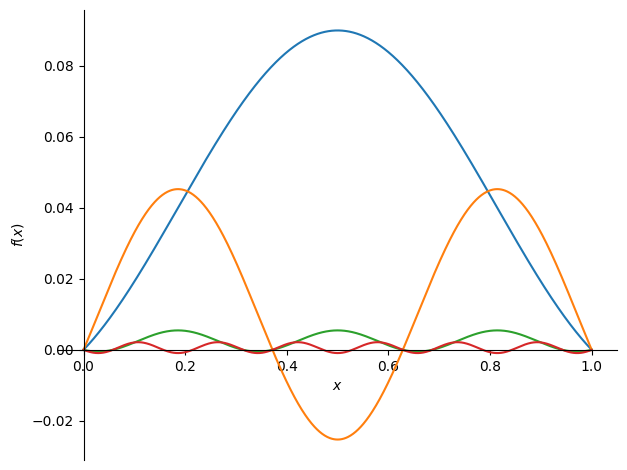

In [94]:
from sympy import Function, dsolve, Derivative, plot
from sympy.abc import x

B = symbols("B", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)

# Solve the ODE
eqns = Derivative(B(x), x, x) + k*k*B(x)-1
ics0 = {B(0): 0, B(1): 0}
sol = dsolve(eqns,ics = ics0)

plotb = plot(show=False)
for ki in sym.Array([5.,10.,20.,40.]):
    plotb1 = plot(sol.rhs.subs(k,ki), (x, 0, 1), show=False)
    plotb.append(plotb1[0])
plotb.show()

### Section 2.2: Damped Case: Solving both the cosinus mode amplitude A(x) and sinus mode amplitude B(x)   

The amplitude of the cosinus mode amplitude $A(x)$ increasing with damping as expected. 

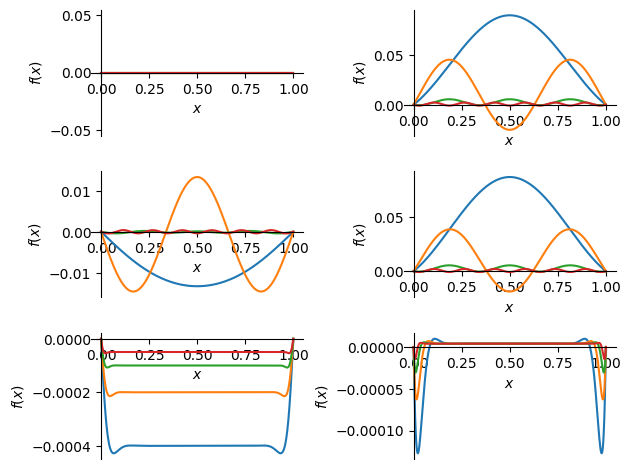

In [6]:
from sympy import Function, dsolve, Derivative, Eq, sin, cos, symbols, pi
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

A = symbols("A", cls=Function)
B = symbols("B", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)
ga = symbols("ga", positive=True)

# Solve the ODE ()
eq1 = Eq(Derivative(A(x), x, x) + k*k*A(x)+ga*k*B(x),0)
eq2 = Eq(Derivative(B(x), x, x) + k*k*B(x)-ga*k*A(x),1) 
#eq2 = Eq(Derivative(B(x), x, x) + k*k*B(x)-ga*k*A(x), cos(pi*x))
eqns = (eq1, eq2) 
ics0 = {A(0): 0, A(1): 0, B(0): 0, B(1): 0}

sol = dsolve(eqns,ics = ics0)

plota1 = plot(show=False)
plotb1 = plot(show=False)
plota2 = plot(show=False)
plotb2 = plot(show=False)
plota3 = plot(show=False)
plotb3 = plot(show=False)

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki, ga:0}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki, ga:0}), (x, 0, 1), show=False)
    plota1.append(plota11[0])
    plotb1.append(plotb11[0])

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki, ga:.5}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki, ga:.5}), (x, 0, 1), show=False)
    plota2.append(plota11[0])
    plotb2.append(plotb11[0])

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki, ga:500}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki, ga:500}), (x, 0, 1), show=False)
    plota3.append(plota11[0])
    plotb3.append(plotb11[0])

PlotGrid(3, 2, plota1, plotb1, plota2, plotb2, plota3, plotb3)